In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rc("figure", figsize=(10, 6))


# 빅데이터 분석에 필요한 pandas의 데이터프레임의 반드시 알아야하는 핵심 기능(7)(8)(9)(10)
    * 데이터프레임 생성: pd.DataFrame(데이터 셋) 함수를 사용하여 데이터프레임을 생성할 수 있다. 
    * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택할 수 있다.
    * 데이터프레임 슬라이싱: 슬라이싱 연산자[start:end:step]를 사용하여 데이터프레임의 부분을 선택할 수 있다.
    * 데이터프레임 필터링: 불리언 마스크(조건식)를 사용하여 데이터프레임의 행과 열을 필터링할 수 있다.
    * 데이터프레임 정렬: sort_values() / sort_index()메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬할 수 있다. -> 인기도 추출 -> 정렬 샘플 찾는다. ***
    * 데이터프레임 집계: groupby()/ agg() / apply() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행할 수 있다.
    * 데이터프레임 결측치/중복 값 클리닝 처리: dropna() / drop_duplicates() / fillna() 메서드를 사용하여 데이터프레임의 결측치를 채울 수 있다.
    * 데이터프레임 결합: merge() 또는 concat() 메서드를 사용하여 여러 데이터프레임을 결합할 수 있다. -> 데이터 병합!!!

## # 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [87]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기
# DataFrame with null vlaues
data = np.random.standard_normal((7, 3)) ## 순서대로 행의 크기 열의 크기 7x3
df = pd.DataFrame(data)

df.iloc[:4, 1] = np.nan ## 처음부터 0~3의 행, 커럶 1에 해당되는 값에 결측지를 넣는다.
df
df.iloc[:2, 2] = np.nan ## 처음부터 0~2의 행, 컬럼 2에 해당되는 값에 결측지를 넣는다.
df

# #1. 결측치 확인 및 처리
df.isna() # -> 켤측지의 값을 True로 표시해 주는 메서드 isna()
df
filtered = df.dropna()
filtered # 결측치가 있는 행이 모두 제거 된다 -> 행을 기준으로 작동된다
# #2. 색인 재설정
filtered.reset_index(drop=True) # index를 재설정해준다. 기본 값 false drop = True의 뜻은 원본의 index를 떨군다는 뜻이다
# #3. 결측치를 평균값으로 채우기
# 3-1 데이터 값의 대표값: 평균, 중앙값, 최대값, 최소값 등등
df.fillna("끼") #df.mean() -> fillna는 결측치를 내가 원하는 값으로 채운다.
df.mean() # -> 컬럼의 평균!!
df.fillna(df.mean()) # -> 해당 컬럼의 결측치를 해당 컬럼의 평균 값으로 채운다.
df.mean()

0    0.250725
1   -1.166013
2    0.381073
dtype: float64

7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * 데이터프레임의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [88]:
# ex 데이터프레임의 중복 데이터 제거하기 
# DataFrame with duplicated values -> 범주형 데이터 (object), 수치 데이터(int 64, float64)
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})


print(data)

# #1. 중복된 데이터 확인
# 기준 열을 기준으로 작동한다.
# 이전에 있던 행에 자신과 같은 값이 있는 지를 확인한다.
#  이후 값은 적용하지 않는다.
data.duplicated()

# #2. 중복된 행 제거하기
data.drop_duplicates(keep = "last") # 곂치면 처음 값을 살릴지 마지막 값을 살리지 정하는 것 first, last

# #3. "K1" 열을 기준으로 중복된 행을 필터링하기
data.drop_duplicates(subset=['k1'], keep = "first") # last 사용 시 마지막 값 이 적용됨

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5


,k1,k2
0,one,1
1,two,1


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 데이터 분석을 수행하시오.
* 데이터셋:


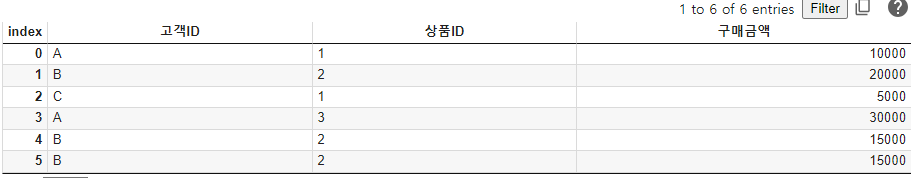
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [89]:
# 데이터셋
data = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]

In [95]:
import pandas as pd
# 데이터프레임 탐색하기(json포멧)
# 1) 주어진 데이터셋을 데이터프레임으로 변환하기
df1 = pd.DataFrame(data)
# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기
df1.iloc[:3] ## 둘이 같음
df1.head(3)
# 3)데이터프레임의 열 레이블 변경하기
df1.rename(columns={"customer_id" : "고객ID",
                 "product_id":"상품ID",
                "amount":"구매 금액"}, inplace = True)
df1

,고객ID,상품ID,구매 금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [96]:
# 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
df1.isna()

# 2) 중복 데이터 확인하기
df1.drop_duplicates(subset=["고객ID","상품ID","구매 금액"], keep= "first")

# 3) 중복 데이터 제거


,고객ID,상품ID,구매 금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000


In [97]:
# 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID의 값을 기준으로 데이/ 터프레임의 행을 내림차순으로 정렬하기 : sort_values()
## by를 통해서원하는 컬럼을 선택해서 정렬 ascending False 내림차순 True 오름차순
## index는 상관 없음 ## 아이디를 기준으로 영어 알파벳 순서대로 정렬 된 것을 알 수 았다.
df1.sort_values(by=["고객ID"], ascending = True)

# 2) 데이터프레임의 기존의 인덱스을 변경 또는 재설정하기
df2 = df1.reset_index(drop = True)
df2

,고객ID,상품ID,구매 금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [99]:
# 데이터분석하기
## 직접 해보기 이번 시간 끊난 후에
# 1) 고객별 구매 금액 합계를 계산하기
result = df1.groupby(['고객ID'])["구매 금액"].sum()
print(result)

고객ID
A    40000
B    50000
C     5000
Name: 구매 금액, dtype: int64


In [100]:
# 2) 상품별 구매 금액 합계를 계산하기
result = df1.groupby(['상품ID'])["구매 금액"].sum()
print(result)

상품ID
1    15000
2    50000
3    30000
Name: 구매 금액, dtype: int64


In [114]:
# 3) 상위 최우수 고객 2명 필터링하기
result = df1.groupby(['고객ID'])["구매 금액"].sum().sort_values(ascending = False)[:2]
print(result.idxmax())

B


In [115]:
# 4) 고객에서 가장 인기있는 상품 찾기
df1["상품ID"].value_counts()

상품ID
2    3
1    2
3    1
Name: count, dtype: int64

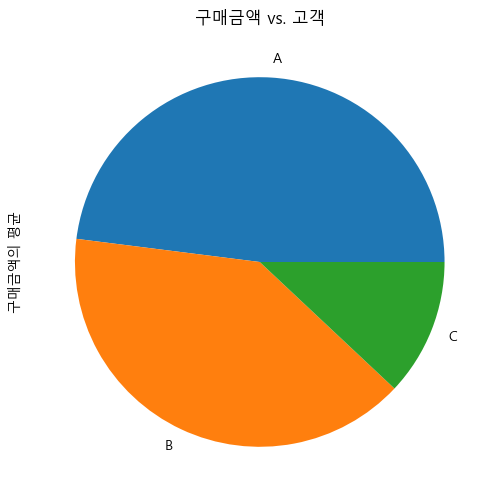

In [144]:
# 5) 고객ID별 구매금액의 평균를 계산하고 시각화하기
result = round(df1.groupby(["고객ID"])["구매 금액"].mean())
result.plot(kind = "pie", color = "red")
#result.plot(kind = "bar", color = "green")
plt.title("구매금액 vs. 고객") ## 이름 만들기
plt.ylabel("구매금액의 평균")
plt.show()

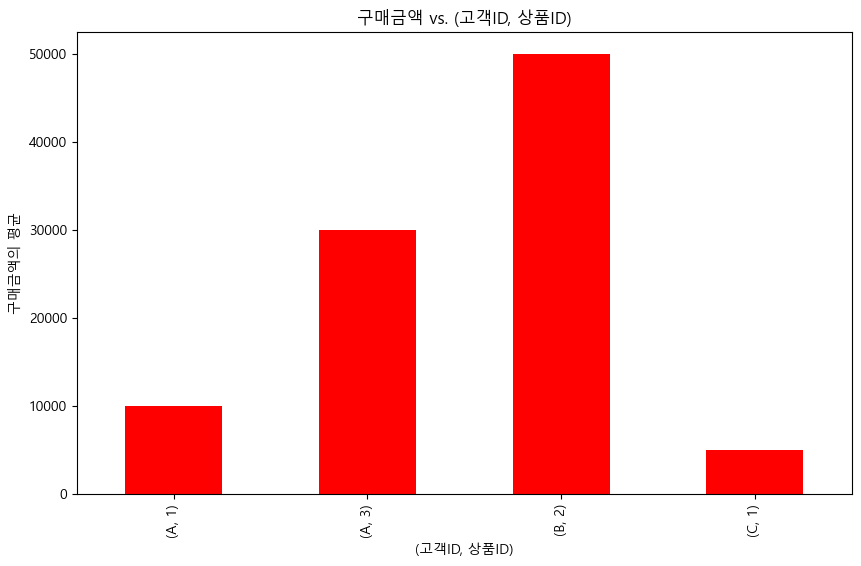

In [136]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화하기
result = round(df1.groupby(["고객ID","상품ID"])["구매 금액"].sum())
result.plot.bar()
result.plot(kind = "bar", color = "re")
plt.title("구매금액 vs. (고객ID, 상품ID)") ## 이름 만들기
plt.ylabel("구매금액의 평균")
plt.xlabel("(고객ID, 상품ID)")
plt.show()

# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임이나 시리즈의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색


In [113]:
# case1>
# 1. 단일 색인 -> 
## 다중색인 생성

# 1) 데이터프레임 생성 -> 아직까지는 단일 색인이다
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [4, 5, 6, 7]})
## RangeIndex(start=0, stop=3, step=1)
## print(df.index)

# 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1),('Z', 3)]

# 3) 다중색인 설정
multi = pd.MultiIndex.from_tuples(index)

## print(multi)
#4) 주어진 단일 데이터 프레임에 다중 인덱스 적용
df.index = multi
print(df)
#2.다중색인 사용
#1) 데이터프레임을 계층적 색인의 첫 번째 인덱스 레벨을 기준으로 그룹화하기
grouped = df.groupby(level = 0)
grouped
# # 2)각 그룹에 대한 정보 출력하기
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

     A  B
X 1  1  4
  2  2  5
Y 1  3  6
Z 3  4  7
Group: X
     A  B
X 1  1  4
  2  2  5

Group: Y
     A  B
Y 1  3  6

Group: Z
     A  B
Z 3  4  7



In [119]:
# case2> 
import pandas as pd

# 다중 인덱스를 가진 데이터프레임 생성
arrays = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]] ## 순서를 가지고 있는 명목형 데이터
index = pd.MultiIndex.from_arrays(arrays, names=('first', 'second'))
df = pd.DataFrame({'data': [1, 2, 3, 4]}, index=index)
# print(df)
# 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
              data
first second      
A     1          1
      2          2

Group: B
              data
first second      
B     1          3
      2          4



In [130]:
# case 3
# 1. 다중 색인 생성
## 단일 데이터프레임
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
## 다중 색인을 가진 데이터 프레임
## set_index로 다중 색인 하기
df = df.set_index(["index1", "index2"])

# 2.다중 색인 사용
# 1)각 그룹에 대한 정보 출력
grouped = df.groupby(level=0)

for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
               data
index1 index2      
A      1          1
       2          2

Group: B
               data
index1 index2      
B      1          3
       2          4



In [140]:
# 2) 데이터셋 슬라이싱 :
print(df)
df.loc["A", 1] # 레벨 1에서 "A" 선택, 레벨 2에서 1 선택

df.loc["B", :] # 레벨 1에서 "B" 선택, 레벨 2에서 모든 값 선택

df.loc[[('A', 2),('B',1)]] # 레벨 1에서 "A"와 "B" 선택, 레벨 2에서 1 선택

               data
index1 index2      
A      1          1
       2          2
B      1          3
       2          4


,,data
index1,index2,
A,2,2
B,1,3


### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

  고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000
5    B    2  15000
            구매금액
고객ID 상품ID       
A    1     10000
B    2     20000
C    1      5000
A    3     30000
B    2     15000
     2     15000


<Axes: >

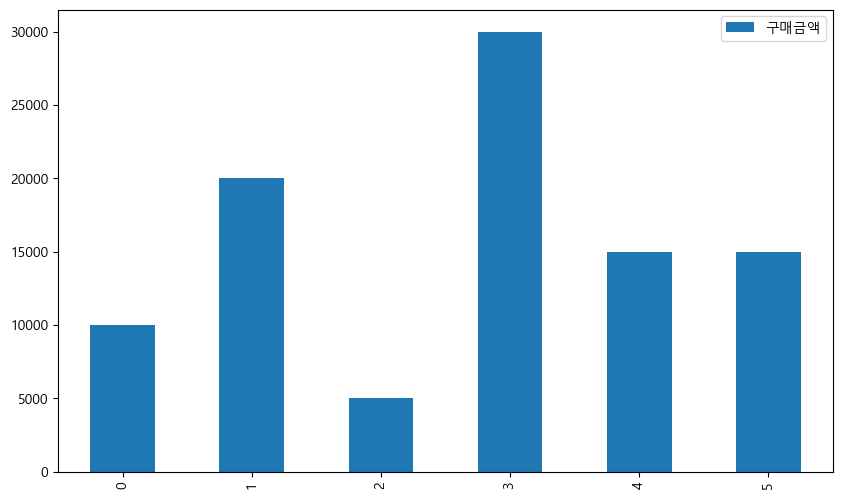

In [154]:
# 데이터셋
data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df4 = pd.DataFrame(data)
print(df4)
# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 주어진 데이터프레임을 그룹하기
df5 = df4.set_index(["고객ID", "상품ID"])
print(df5)
#3. 데이터프레임의 다중색인을 출력하기
df.index
df4.plot.bar()

In [ ]:
# 4. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 5. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 6. 결과를 출력하시오.


# 9.2장. plotting with pandas and seaborn and matplolib


* Bar Plots(막대 그래프)
  * 막대 그래프는 범주형 데이터의 빈도, 비율 또는 백준율을 시각화 하는 대 효과적이다.
    * 빈도 분포 표시: 범주별 빈도를 시각적으로 비교할 수 있다
      * ex) 각각의 막대가 특정 항목의 빈도를 나타내며,막대의 높이는 해당 항목이 빈도에 비례
    * 비율또는 백분율 표시 : 범주별로 전체의 비율 또는 백분율을 표시
      * 이것은 각 범주의 중요성이나 상대적인 크기를 비교하는데 도움.
    * 시계열 데이터 표시 : 시간에 따른 변화를 보여줄 떄 유용
      * 각 시점 또는 기간에 대한 데이터를 각각의 막대로 나타낼 수 있다.
    * 다중 변수의 비교: 여러 범주에 대한 여러 그룹 간의 비교를 수행 사용
      *이를 통해 각 그룹 간의 차이를 직관적으로 이해할 수 있다.

              A         B         C         D
one    0.341194  0.740123  0.910788  0.293958
two    0.186707  0.884217  0.384068  0.616906
three  0.596976  0.323301  0.640037  0.448591
four   0.698460  0.161938  0.195358  0.482792
five   0.500063  0.768094  0.192860  0.992169
six    0.325300  0.846000  0.818142  0.906572


<Axes: >

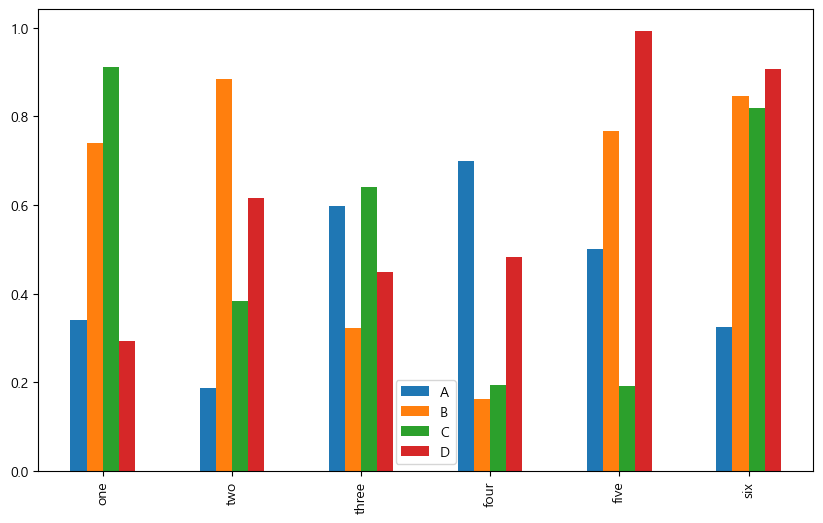

In [152]:
# pandas-dataframe의 plot.bar(): 사용법
#1. DataSet
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)

df.plot.bar()

## [예제]
* 'examples/tips.csv'을 로딩하여 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

size  1   2   3   4  5  6
day                      
Thur  1  48   4   5  1  3
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1

size   2   3   4  5
day                
Thur  48   4   5  1
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3

size         2         3         4         5
day                                         
Thur  0.827586  0.068966  0.086207  0.017241
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000


<Axes: xlabel='day', ylabel='day'>

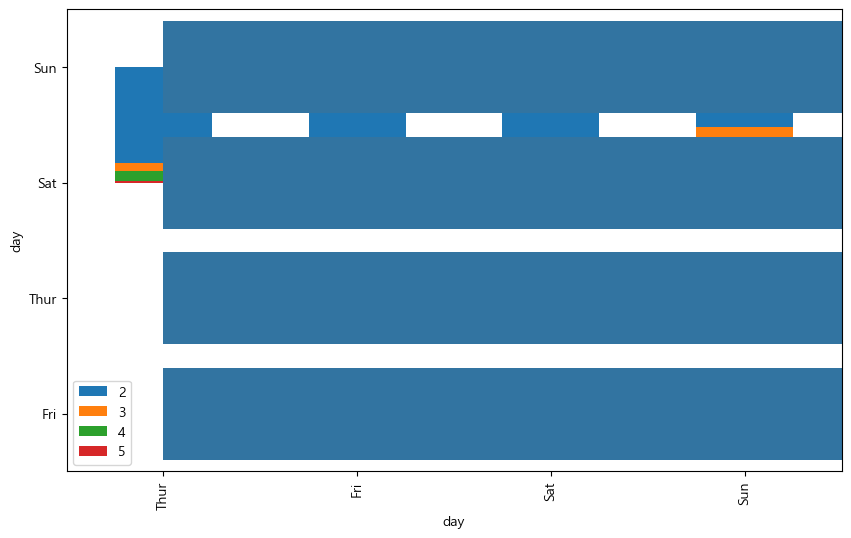

In [182]:
# 1. Load a dataset
tips = pd.read_csv('examples/tips.csv') # 에이터 프레임

# 2. 데이터 프레임 생성 : 빈도수 표 만들기
party_counts = pd.crosstab(tips["day"], tips['size'])
print(party_counts)
print()

#3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])
print(party_counts)
print()

# 3. 필터링 -> 불필요한 데이터를 삭제하는 것을 의미한다.
party_counts = party_counts.loc[:,2:5]
print(party_counts)
print()

# 4. 데이터 정규화 : 데이터의 노멀라이제이션 -> 0~1 사이의 값으로 만들어 준다. 비율로 계산
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")

print(party_pcts)
# 5. 막대그래프로 그리기
party_pcts.plot.bar(stacked=True)

# 6. 팁의 배분율 열 추가하기
# 팁 비율 계산
tips["tip_pct"] = (tips['tip'] / (tips['total_bill'])) *100
sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time')

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오. 주말에 해보기~~
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [183]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}
df6 = pd.DataFrame(data)
df6

,Name,Age,City
0,John,20,New York
1,Mary,25,Los Angeles
2,Bob,30,Chicago
3,Alice,35,Houston
4,Tom,40,Dallas


In [184]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [185]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [190]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기
df6.groupby("Name")


# 10장 데이터 집계와 그룹 연산(!!!!!!!)
* 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법




* groupby() 연산에 대한 원리
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays.
       * agg() / apply() / 
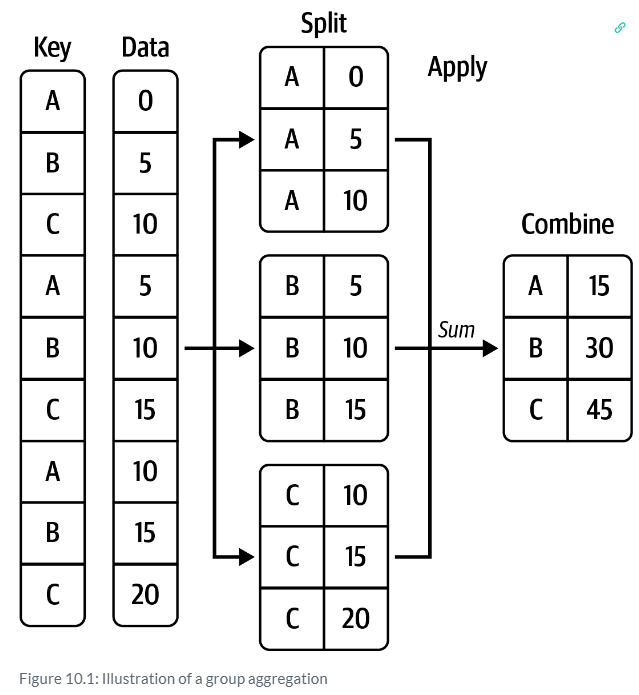

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [13]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df
df.index #RangeIndex

RangeIndex(start=0, stop=7, step=1)

* groupby()
  * df.groupby(["컬럼명1","컬럼명2"]).함수()
  * df.groupby(["컬럼명1","컬럼명2"])[["컬럼명1",.....]].함수()


In [24]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨
print(df)
print()
# df.groupby(["key1"]).mean() # 생성 되어지는 데이터 프레임의 섹인이 된다. 누락된 데아터의 값은 제거하고 평균 값을 낸다.
df.groupby(["key1"]).size() ## 생성되는 데이터 값의 수 해당 색인에서 곂치는 값을 수라고 생각 하면 된다. 
df.groupby(["key1"]).count() ## 총 컬럼별 각 그룹에 속하는 데이터의 개수
result = df.groupby(["key1"]).sum()

df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님 범주형 데이터의 값이 빠빔

result1 = df.groupby(["key2","key1"]).count() # 다중 색인 데이터프레임 (multiindex(key1, key2)
result1.index
# 특히 대용량 데이터셋을 다룰 때 소수의 열(data2)만 집계(평균)하기
df.groupby(["key1", "key2"])[["data2"]].sum()

   key1  key2     data1     data2
0     a     1  0.259050  0.438238
1     a     2 -0.098138  1.054390
2  None     1  1.408404  0.550641
3     b     2 -1.603892 -1.819023
4     b     1 -1.827077  0.357451
5     a  <NA> -2.770136  0.712114
6  None     1  0.391649  0.473852



data2
key1 key2          
a    1     0.438238
     2     1.054390
b    1     0.357451
     2    -1.819023

## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


In [26]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [32]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = round(tips["tip"] / tips["total_bill"] * 100)
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,6.0
1,10.34,1.66,No,Sun,Dinner,3,16.0
2,21.01,3.50,No,Sun,Dinner,3,17.0
3,23.68,3.31,No,Sun,Dinner,2,14.0
4,24.59,3.61,No,Sun,Dinner,4,15.0


* agg()
  * df.groupby([컬럼리스트]).agg([집계함수리스트])
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [39]:
# ex1
# grouped = tips.groupby(["day", "smoker"])
# grouped_pct = grouped["tip_pct"]
# # grouped_pct.mean ()으로 사용하지 않음
# result = grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기
result = tips.groupby(["day", "smoker"])["tip_pct"].agg(["mean"])
print(result)

                  mean
day  smoker           
Fri  No      15.250000
     Yes     17.400000
Sat  No      15.822222
     Yes     14.880952
Sun  No      16.017544
     Yes     18.736842
Thur No      16.066667
     Yes     16.235294


In [40]:
# ex2
def diff(arr):
    return arr.max() - arr.min()
result = tips.groupby(["day", "smoker"])["tip_pct"].agg([diff,"mean", "std"]) # 사용자 함수는 문자열로 사용하지 않음
print(result)
##grouped_pct.agg(["mean", "std"])  #함수 이름을 열 이름으로 하는 데이터프레임을 얻는다.

             diff       mean        std
day  smoker                            
Fri  No       7.0  15.250000   2.986079
     Yes     16.0  17.400000   5.138093
Sat  No      23.0  15.822222   3.938671
     Yes     29.0  14.880952   6.145402
Sun  No      19.0  16.017544   4.232068
     Yes     64.0  18.736842  15.419476
Thur No      20.0  16.066667   3.904543
     Yes     15.0  16.235294   3.897586


In [44]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["count", "mean", "max",diff]
tips.groupby(["day", "smoker"])[["tip_pct", "total_bill"]].agg(functions)
result = grouped[["tip_pct", "total_bill"]].agg(functions)  # 데이터프레임은 계층적인 열로 구성
result

tip_pct                        total_bill                         
              count       mean   max  diff      count       mean    max   diff
day  smoker                                                                   
Fri  No           4  15.250000  19.0   7.0          4  18.420000  22.75  10.29
     Yes         15  17.400000  26.0  16.0         15  16.813333  40.17  34.42
Sat  No          45  15.822222  29.0  23.0         45  19.661778  48.33  41.08
     Yes         42  14.880952  33.0  29.0         42  21.276667  50.81  47.74
Sun  No          57  16.017544  25.0  19.0         57  20.506667  48.17  39.40
     Yes         19  18.736842  71.0  64.0         19  24.120000  45.35  38.10
Thur No          45  16.066667  27.0  20.0         45  17.113111  41.19  33.68
     Yes         17  16.235294  24.0  15.0         17  19.190588  43.11  32.77

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [48]:
grouped = tips.groupby(["day", "smoker"], as_index=False) #데이터 프레임의 평탄화
grouped.mean(numeric_only=True)

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,15.250000
1,Fri,Yes,16.813333,2.714000,2.066667,17.400000
2,Sat,No,19.661778,3.102889,2.555556,15.822222
3,Sat,Yes,21.276667,2.875476,2.476190,14.880952
4,Sun,No,20.506667,3.167895,2.929825,16.017544
5,Sun,Yes,24.120000,3.516842,2.578947,18.736842
6,Thur,No,17.113111,2.673778,2.488889,16.066667
7,Thur,Yes,19.190588,3.030000,2.352941,16.235294


## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.
* df.groupby().apply(함수, 함수의 인자 값) 한가지를 전달하거나 익명의 함수를 사용하고 싶을때

In [53]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
## top() 호출 
top(tips, n=6) # 디폴트 값일 경우 생랴갷도 된다

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,71.0
178,9.60,4.00,Yes,Sun,Dinner,2,42.0
67,3.07,1.00,Yes,Sat,Dinner,1,33.0
232,11.61,3.39,No,Sat,Dinner,2,29.0
109,14.31,4.00,Yes,Sat,Dinner,2,28.0
183,23.17,6.50,Yes,Sun,Dinner,4,28.0


In [57]:
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
result = tips.groupby(["smoker", "day"]).apply(top, n=2, column="total_bill")
print(result)

                 total_bill    tip smoker   day    time  size  tip_pct
smoker day                                                            
No     Fri  94        22.75   3.25     No   Fri  Dinner     2     14.0
            91        22.49   3.50     No   Fri  Dinner     2     16.0
       Sat  212       48.33   9.00     No   Sat  Dinner     4     19.0
            59        48.27   6.73     No   Sat  Dinner     4     14.0
       Sun  156       48.17   5.00     No   Sun  Dinner     6     10.0
            112       38.07   4.00     No   Sun  Dinner     3     11.0
       Thur 142       41.19   5.00     No  Thur   Lunch     5     12.0
            85        34.83   5.17     No  Thur   Lunch     4     15.0
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4     12.0
            90        28.97   3.00    Yes   Fri  Dinner     2     10.0
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3     20.0
            102       44.30   2.50    Yes   Sat  Dinner     3      6.0
      

C:\Users\우리집\AppData\Local\Temp\ipykernel_10172\3915716884.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = tips.groupby(["smoker", "day"]).apply(top, n=2, column="total_bill")


In [55]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,15.953642,3.988881,6.0,14.0,16.0,18.5,29.0
Yes,93.0,16.322581,8.505959,4.0,11.0,15.0,20.0,71.0


In [ ]:
result.unstack("smoker")


## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

In [ ]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()